# Домашнее задание "Сегментация и детекция объектов"

***Задание***:  
Построить классификатор изображений рукописного ввода на базе MNIST. 

***Описание задания***:  
1. Классификатор предлагается строить на признаках, полученных в результате предобработки изображений.  
2. В качестве модели классификатора можно использовать любую известную Вам модель, за исключением сверточных нейронных сетей.  
3. Критерием качества классификатора является метрика accuracy. Для получения зачета по данной работе, значение метрики accuracy должно быть больше 0.6. Метрика оценивается на тестовой выборке в рамках контеста Digit Recognizer на Kaggle.  
4. Решение необходимо предоставить в виде ipython-ноутбука с реализацией процесса построения модели и скриншота с финальным результатом на Kaggle.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Загрузка данных

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
X = train.drop('label', axis=1)
y = train['label']

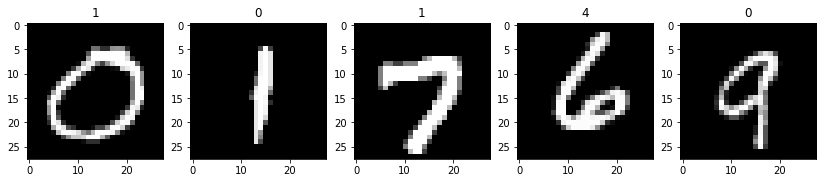

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(np.resize(X, (train.shape[0], 28, 28))[-5:], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y[i - 1]);

### Подготовка данных

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=12345)

In [6]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((33600, 784), (8400, 784), (33600,), (8400,))

In [7]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Principal Component Analysis

Выберем PCA для построения признаков, на которых впоследствии будем обучать модель.

Но для начала нормализуем данные:

In [8]:
stdsc=MinMaxScaler()
x_train_std=stdsc.fit_transform(x_train)
x_val_std=stdsc.transform(x_val)
x_test_std=stdsc.transform(test)

И, собственно, применим сам метод главных компонент. Самый оптимальный вариант оказался - 100 признаков:

In [9]:
pca=PCA(n_components=100,svd_solver='randomized',whiten=True)
x_train_pca=pca.fit_transform(x_train_std)
x_val_pca=pca.transform(x_val_std)
x_test_pca=pca.transform(x_test_std)

In [10]:
x_train_pca=pd.DataFrame(x_train_pca)
x_val_pca=pd.DataFrame(x_val_pca)
x_test_pca=pd.DataFrame(x_test_pca)

x_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.209493,1.559114,-0.669776,0.783158,-0.500557,0.090000,-0.329297,0.728085,-0.441879,1.482388,...,3.280186,-2.246596,-0.360054,-2.290017,-1.987466,0.627000,-0.673503,1.186512,-0.203051,1.480141
1,-0.543842,0.826815,0.868475,-1.194859,0.834201,0.873294,0.189993,-1.235418,0.253150,-2.367245,...,-0.191938,0.490962,1.585162,0.366642,0.449545,-0.607521,-1.756199,0.846989,2.009452,-0.918835
2,-1.317971,-1.383733,0.863713,0.162722,0.280032,1.906883,-1.284618,0.083818,1.386677,0.284623,...,0.867183,0.288291,0.877901,-0.683131,0.382603,-0.217627,-1.354293,-0.302545,-1.334043,-0.118347
3,0.142152,-0.463488,0.515747,-1.416732,0.380065,-0.091604,-1.806536,-0.148498,-0.194370,0.211430,...,-0.021378,-0.931193,1.779929,-2.356286,-1.550959,-1.556098,-1.069101,-0.084075,-0.158181,-0.516238
4,2.159854,0.505307,0.952365,2.377850,0.620238,-0.379751,2.315079,-1.649973,-0.417261,0.443945,...,-0.365612,-1.133984,-0.325530,1.587816,0.741188,0.410350,-2.339432,1.384150,0.012942,-1.026190


Теперь сравним исходные 784-мерные данные и наш сокращенный набор из 100 измерений:

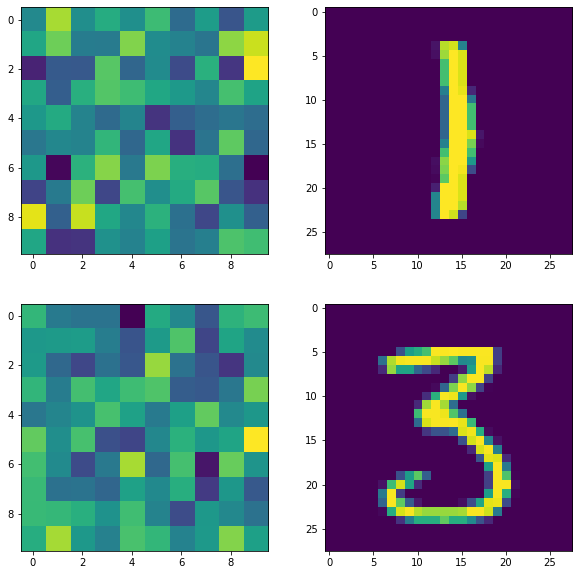

In [11]:
pd_x_train_std=pd.DataFrame(x_train_std)

fig,axes=plt.subplots(figsize=(10,10),ncols=2,nrows=2)
axes=axes.flatten()
for i in range(0,4):
    jj=np.random.randint(0,x_train_std.shape[0])          # выберем рандомно
    if i%2==0 :
        IMG_HEIGHT=10
        IMG_WIDTH=10
        axes[i].imshow(x_train_pca.iloc[[jj]].values.reshape(IMG_HEIGHT,IMG_WIDTH))
    else:
        IMG_HEIGHT=28
        IMG_WIDTH=28
        axes[i].imshow(pd_x_train_std.iloc[[jj]].values.reshape(IMG_HEIGHT,IMG_WIDTH))    

### Обучение модели

Обучим ансамбль - случайный лес.

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini',random_state=12345)
rfc.fit(x_train_pca, y_train)

RandomForestClassifier(random_state=12345)

In [13]:
rfc_pred_train = rfc.predict(x_train_pca)
rfc_pred_val = rfc.predict(x_val_pca)

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy train: %s' % accuracy_score(y_train, rfc_pred_train))
print('Accuracy val: %s' % accuracy_score(y_val, rfc_pred_val))

Accuracy train: 1.0
Accuracy val: 0.9427380952380953


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_val, rfc_pred_val))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       862
           1       0.97      0.98      0.98       921
           2       0.94      0.94      0.94       813
           3       0.92      0.93      0.93       904
           4       0.93      0.94      0.94       804
           5       0.93      0.91      0.92       773
           6       0.96      0.97      0.97       814
           7       0.96      0.94      0.95       844
           8       0.93      0.91      0.92       828
           9       0.92      0.92      0.92       837

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



В целом модель довольно успешно определяет цифры, при этом видно, что самые сложные для определения для модели стала цифра 8 (согласно данным столбца показателя f1). При этом для полноты (recall) самой "нечитабельной" стала цифра 8, а для точности (precision) - 3, 5 и 9. 

Теперь сделаем предсказания для тестового файла и запишем их в файл:

In [16]:
rfc_pred_test = rfc.predict(x_test_pca)

In [17]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(rfc_pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [20]:
# !head submit.txt

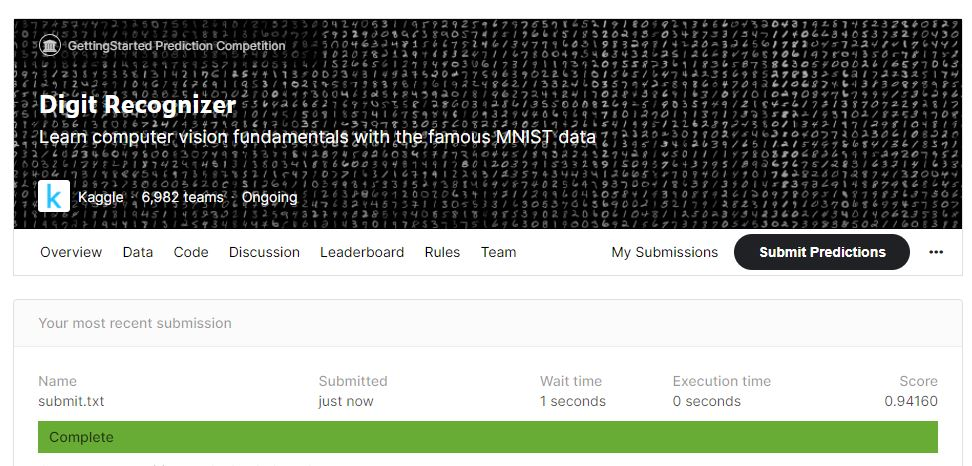

In [19]:
from IPython.display import Image
Image(filename='my_subm.JPG') 